In [5]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
polyxs = [39,38,12,14,31,27,40,46,46,34,34,49,49,51,15]
polyys = [51,57,43, 7,27,34,25,21,13,13, 8, 8,13,50,37]

dotxs = [43,48,18,36,60,46,14,12,35,32,34,18,28,54,47,31,56,14,19,58,15,29,24,13,19,31,24,45,22,58,25,17,38,50,32,60,32,25,22,59,21,30,21,23,31,60,56,38,40,14]
dotys = [35,54,28,24,6,39,60,41,26,39,35,45,39,30,57,36,38,42,52,23,43,31,22,26,41,13,59,59,17,20,60,48,48,38,49,27,50,7,31,43,15,32,23,48,40,59,57,35,4,25]

In [7]:
from subprocess import Popen, PIPE

def show_pairs(xs, ys):
    return "\n".join(map(" ".join, zip(map(str, xs), map(str, ys))))

input_ = "{polygon_size} {dots_num}\n{polygon}\n{dots}".format( 
    polygon_size=len(polyxs),
    dots_num=len(dotxs),
    polygon=show_pairs(polyxs, polyys),
    dots=show_pairs(dotxs, dotys))
                    
cproc = Popen("./polygon", stdin=PIPE, stdout=PIPE)
output, err = cproc.communicate(input_.encode('utf-8'))

output = ["r" if ans.decode('utf-8') == "YES" else "b" for ans in output.split()]

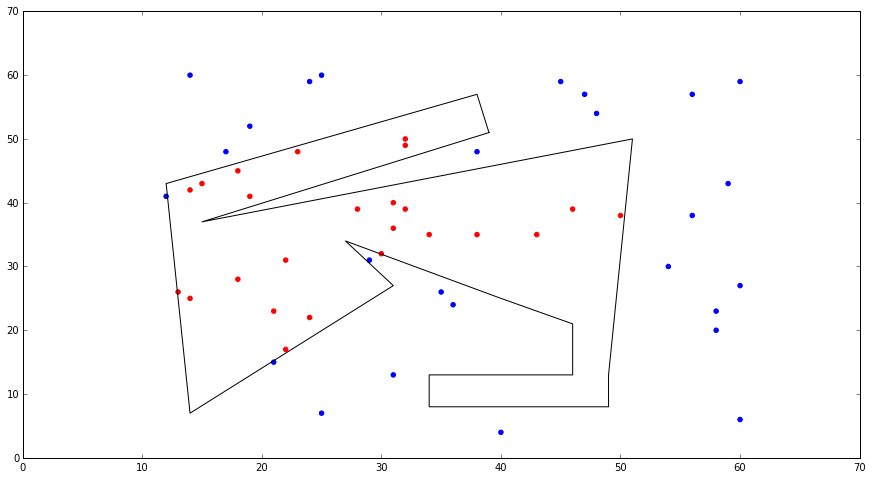

In [8]:
plt.figure(figsize=(15,8))

plt.plot(polyxs + [polyxs[0]], polyys + [polyys[0]], color='k')
plt.scatter(dotxs, dotys, color=output)